In [1]:
import tensorflow as tf # keras utiliza el motor tensorflow como base -> mas sencillo keras
from sklearn.model_selection import GridSearchCV
import keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
from keras import models
from keras import layers

In [6]:
network = models.Sequential() # clf = LogisticRegression()
layer1 = layers.Dense(10, activation='relu', input_shape=(13,)) # 28*28 = 784(vector input)
network.add(layer1)
layer2 = layers.Dense(10, activation='relu') 
network.add(layer2)
layer_out = layers.Dense(1, activation='relu') # muticlasificación
network.add(layer_out)

In [7]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
network.compile(loss='mean_squared_error',
optimizer='rmsprop',
metrics=['mean_squared_error'])

In [9]:
history = network.fit(train_data, train_targets, epochs=10, batch_size=101, validation_data=(test_data, test_targets))

Epoch 1/10
4/4 [==============================] - 3s 209ms/step - loss: 981.7399 - mean_squared_error: 981.7399 - val_loss: 493.5714 - val_mean_squared_error: 493.5714
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 355.5084 - mean_squared_error: 355.5084 - val_loss: 275.9034 - val_mean_squared_error: 275.9034
Epoch 3/10
4/4 [==============================] - 0s 25ms/step - loss: 216.9860 - mean_squared_error: 216.9860 - val_loss: 201.1128 - val_mean_squared_error: 201.1128
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 171.2391 - mean_squared_error: 171.2391 - val_loss: 172.9122 - val_mean_squared_error: 172.9122
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 156.4884 - mean_squared_error: 156.4884 - val_loss: 161.1310 - val_mean_squared_error: 161.1310
Epoch 6/10
4/4 [==============================] - 0s 22ms/step - loss: 150.2243 - mean_squared_error: 150.2243 - val_loss: 152.3743 - val_mean_squared_error: 152.37

In [10]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [11]:
history.history['val_loss']

[493.5714111328125,
 275.9034118652344,
 201.11280822753906,
 172.91224670410156,
 161.13101196289062,
 152.3743438720703,
 142.4683837890625,
 129.7780303955078,
 114.17179870605469,
 105.12090301513672]

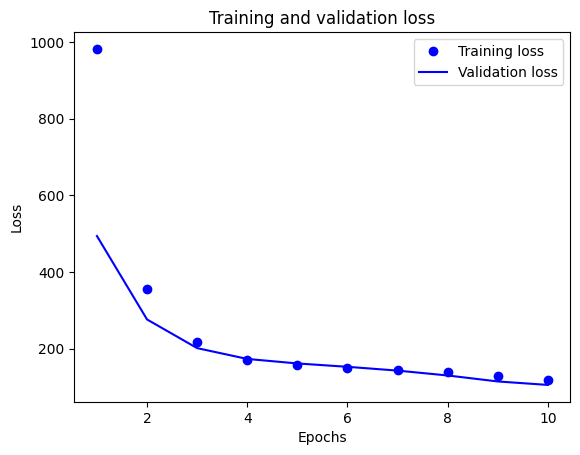

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

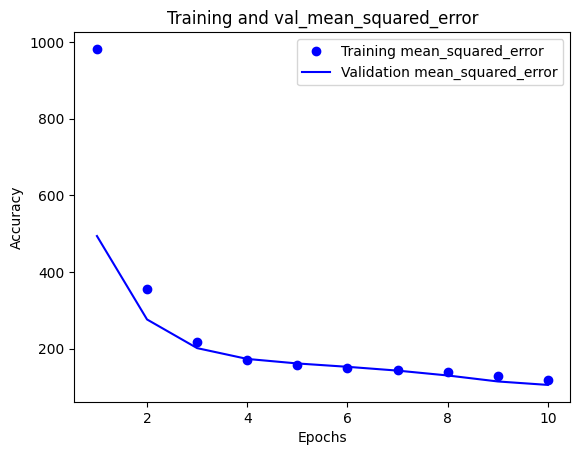

In [13]:
plt.clf()
acc_values = history_dict['mean_squared_error']
val_acc_values = history_dict['val_mean_squared_error']
plt.plot(epochs, acc_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_acc_values, 'b', label='Validation mean_squared_error')
plt.title('Training and val_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Aplicar PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)

# Aplicar StandartScaler
scaler = StandardScaler()
train_data_poly = scaler.fit_transform(train_data_poly)
test_data_poly = scaler.transform(test_data_poly)

# Construir la red neuronal con los datos preprocesados
model_poly = models.Sequential()
model_poly.add(layers.Dense(10, activation='relu', input_shape=(train_data_poly.shape[1],)))
model_poly.add(layers.Dense(10, activation='relu'))
model_poly.add(layers.Dense(1, activation='relu'))

# Compilar el modelo
model_poly.compile(loss='mean_squared_error',
                   optimizer='rmsprop',
                   metrics=['mean_squared_error'])

# Entrenar el modelo
model_poly.fit(train_data_poly, train_targets, epochs=100, batch_size=1, verbose=0)

# Evaluar el modelo
test_loss_poly, test_mse_poly = model_poly.evaluate(test_data_poly, test_targets)
print(f'Test MSE (con preprocesamiento): {test_mse_poly}')

4/4 [==============================] - 0s 5ms/step - loss: 15.9468 - mean_squared_error: 15.9468
Test MSE (con preprocesamiento): 15.94681167602539


In [15]:
history_poly = network.fit(train_data, train_targets, epochs=10, batch_size=101, validation_data=(test_data, test_targets))

Epoch 1/10
4/4 [==============================] - 0s 112ms/step - loss: 110.8834 - mean_squared_error: 110.8834 - val_loss: 97.3653 - val_mean_squared_error: 97.3653
Epoch 2/10
4/4 [==============================] - 0s 28ms/step - loss: 105.1965 - mean_squared_error: 105.1965 - val_loss: 92.0726 - val_mean_squared_error: 92.0726
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 101.8130 - mean_squared_error: 101.8130 - val_loss: 87.6050 - val_mean_squared_error: 87.6050
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 100.2064 - mean_squared_error: 100.2064 - val_loss: 84.1262 - val_mean_squared_error: 84.1262
Epoch 5/10
4/4 [==============================] - 0s 43ms/step - loss: 93.6469 - mean_squared_error: 93.6469 - val_loss: 81.3630 - val_mean_squared_error: 81.3630
Epoch 6/10
4/4 [==============================] - 0s 36ms/step - loss: 98.4063 - mean_squared_error: 98.4063 - val_loss: 81.1007 - val_mean_squared_error: 81.1007
Epoch 7/10
4/

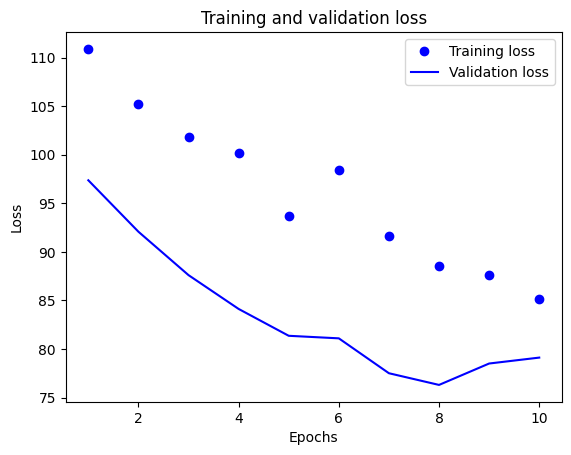

In [16]:
%matplotlib inline
history_dict = history_poly.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

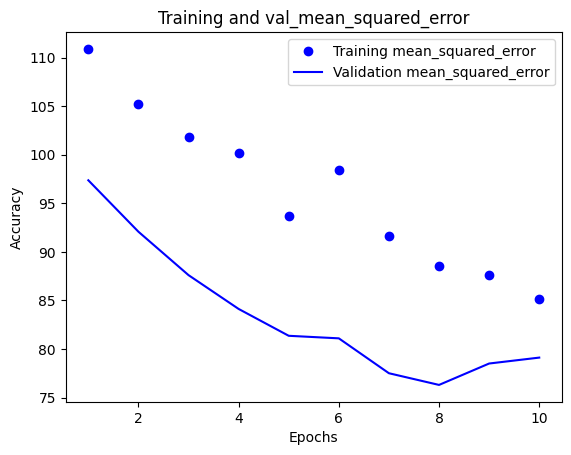

In [17]:
plt.clf()
acc_values = history_dict['mean_squared_error']
val_acc_values = history_dict['val_mean_squared_error']
plt.plot(epochs, acc_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_acc_values, 'b', label='Validation mean_squared_error')
plt.title('Training and val_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()